In [1]:
import numpy as np
from hamiltonian import hamiltonian
from super_cell import super_cell
from k_space import k_space
from observables import observables
from z2_wcc import z2_wcc
import matplotlib.pyplot as plt
from copy import deepcopy

# Import primitive bulk Hamiltonian

In [3]:
bra_vec   = np.array([[-3.2332500,    0.0000000,    3.2277076],
                      [ 0.0000000,    3.2332500,    3.2277076],
                      [-3.2332500,    3.2332500,    0.0000000]])
spin      = True
basis     = np.array([0,1])
n_elec    = 6
ef        = 3.35382580
inputfile = "../../test_ham/HgTe_Hg_s_Te_p.dat"
Ham_bulk = hamiltonian(inputfile,bra_vec,spin,basis,ef,N_ELEC=n_elec)

Reading Hamiltonian...
Time for reading hr-file:  0.35226893424987793
Hamiltonian from file ../../test_ham/HgTe_Hg_s_Te_p.dat successfully loaded.
H(R) is spin-full and contains 557 R-vectors and 4 orbitals.


Calculating Z_2 invariant for Gamma-plane...
Jump at pump:5
Z_2=1
Calculating Z_2 invariant for BZ-surface plane...
Z_2=0


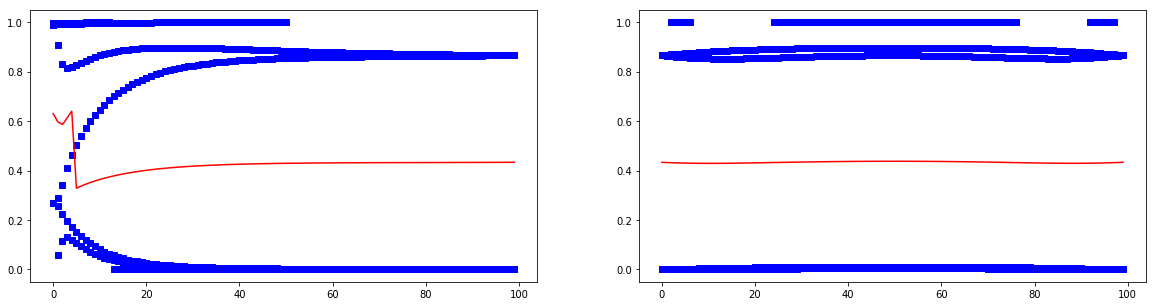

In [4]:
n_pump = np.array([100,50])
normal = 2
z2 = z2_wcc(Ham_bulk,n_pump,normal)
z2.plot_wcc()

# Bulk band structure
## k-path

In [5]:
ktype     = "path"
kbasis    = "red"
vecs      = np.array([[ 0.5, 0.5, 0.5],
                      [ 0.0, 0.0, 0.0],
                      [ 0.5, 0.0, 0.5]])

npoints   = 1000
K_space_bulk = k_space(ktype,kbasis,vecs,Ham_bulk.bra_vec,npoints)

## calculation

In [9]:
op_types = ["S","L"]
op_types_k = ["Orb_SOC_inv","BC"]
observables_bulk = observables(Ham_bulk,K_space_bulk,op_types,op_types_k,PREFIX="bulk_")
#print(observables_bulk.ops["S"].op)
observables_bulk.calculate_ops()
observables_bulk.__dict__.keys()
observables_bulk.ops["S"].__dict__.keys()
#observables_bulk.ops["S"].val

Initializing k-independent operator S.
Initializing k-independent operator L.
Inititalizing k-dependent operator Orb_SOC_inv.
Inititalizing k-dependent operator BC.
Calculating operators on the given k-space...
Diagonalizing all k-points in parallel.
Time for running H(k) FT: 0.0688178539276123
Time for diagonalizing H(k): 0.030391931533813477
Time for calculating expectation value of operator S: 0.0277249813079834
Time for calculating expectation value of operator L: 0.031075000762939453
Time for calculating expectation value of operator Orb_SOC_inv: 0.22881507873535156
Time for calculating expectation value of operator BC: 0.09202909469604492
Shifting eigenvalues w.r.t. Fermi level...
Running post-processing for operator S.
Running post-processing for operator L.
Running post-processing for operator Orb_SOC_inv.
No post-processing.
Running post-processing for operator BC.
Writing eigenvalues output.
Writing output for operator S.
Writing output for operator L.
Writing output for oper

dict_keys(['post', 'val', 'prec', 'V', 'f_spec', 'op', 'expval', 'ham', 'val_k_int', 'val_kE_int', 'val_b_int', 'op_type'])

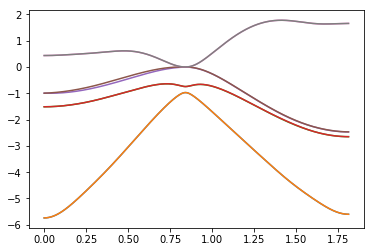

In [10]:
plt.plot(observables_bulk.k_space.k_dist,observables_bulk.evals)
plt.show()

# Calculating the Berry curvature in the Gamma-plane

## k-space

In [11]:
ktype     = "plane"
kbasis    = "red"
dist = 0.1
vecs      = np.array([[ 0.0, 0.0, 0.0],
                      [dist*(-1.0), 0.0,dist*(-1.0)],
                      [ 0.0, dist*1.0, dist*1.0]])

npoints   = 101
K_space_plane = k_space(ktype,kbasis,vecs,Ham_bulk.bra_vec,npoints)

## Calculation

In [12]:
op_types = ["S","L"]
op_types_k = ["Orb_SOC_inv","BC"]
observables_bulk = observables(Ham_bulk,K_space_plane,op_types,op_types_k,PREFIX="plane_")
observables_bulk.calculate_ops()

Initializing k-independent operator S.
Initializing k-independent operator L.
Inititalizing k-dependent operator Orb_SOC_inv.
Inititalizing k-dependent operator BC.
Calculating operators on the given k-space...
Diagonalizing all k-points in parallel.
Time for running H(k) FT: 0.28423404693603516
Time for diagonalizing H(k): 0.15803098678588867
Time for calculating expectation value of operator S: 0.14569878578186035
Time for calculating expectation value of operator L: 0.14752411842346191
Time for calculating expectation value of operator Orb_SOC_inv: 1.3174009323120117
Time for calculating expectation value of operator BC: 0.4774799346923828
Shifting eigenvalues w.r.t. Fermi level...
Running post-processing for operator S.
Running post-processing for operator L.
Running post-processing for operator Orb_SOC_inv.
No post-processing.
Running post-processing for operator BC.
Writing eigenvalues output.
Writing output for operator S.
Writing output for operator L.
Writing output for operat